In [1]:
!pip install nltk stopwords

In [2]:
pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=a52567b77239054db4dbf64265f6ea91bed99f9f5835789f11c586d52a6470ce
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [3]:
import logging
import transformers

# Set the logging level for transformers to ERROR
logging.getLogger("transformers").setLevel(logging.ERROR)


In [4]:
import pandas as pd

from matplotlib_venn import venn2, venn3

import matplotlib.pyplot as plt

import seaborn as sns



import warnings

warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv('/kaggle/input/fedratefinal/fedratefinal.csv')

data

Judul Berita  \
0      Global M&A volumes hit record high in 2021, br...   
1                How Many Side Hustle Hours Is Too Many?   
2      Uttarakhand CM to distribute free mobiles, tab...   
3      Here’s (Almost) Everything Wall Street Expects...   
4      Can the stock market's momentum continue into ...   
...                                                  ...   
21471  BoE's Pill urges cautious approach to cutting ...   
21472  September Jobs Data Could Delay Fed Rate Cuts,...   
21473  Steady Unemployment, Moderate Job Growth May H...   
21474  Dollar Soars as U.S. Job Market Surges, Gold D...   
21475  Fed's Tightrope: Balancing Job Growth and Infl...   

                         Nama Media Waktu Terbit  \
0                    ET BrandEquity   2022-01-01   
1                   The Motley Fool   2022-01-01   
2                              mint   2022-01-01   
3                         Bloomberg   2022-01-02   
4                               CNN   2022-01-02   
...                             ...          ...   
21471                           MSN   2024-10-04   
21472                  Coin Edition   2024-10-04   
21473  International Business Times   2024-10-04   
21474                  Devdiscourse   2024-10-04   
21475                  Devdiscourse   2024-10-04   

                                             Link Berita  
0      https://brandequity.economictimes.indiatimes.c...  
1      https://www.fool.com/the-ascent/personal-finan...  
2      https://www.livemint.com/news/india/uttarakhan...  
3      https://www.bloomberg.com/graphics/2022-invest...  
4      https://www.cnn.com/2022/01/02/investing/stock...  
...                                                  ...  
21471  https://www.msn.com/en-us/money/markets/boe-s-...  
21472  https://coinedition.com/id/september-jobs-data...  
21473  https://www.ibtimes.com/steady-unemployment-mo...  
21474  https://www.devdiscourse.com/article/business/...  
21475  https://www.devdiscourse.com/article/business/...  

[21476 rows x 4 columns]

In [6]:
data.isnull().sum()

Judul Berita    0
Nama Media      0
Waktu Terbit    0
Link Berita     0
dtype: int64

In [7]:
data.duplicated().sum()

4

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21472 entries, 0 to 21475
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Judul Berita  21472 non-null  object
 1   Nama Media    21472 non-null  object
 2   Waktu Terbit  21472 non-null  object
 3   Link Berita   21472 non-null  object
dtypes: object(4)
memory usage: 838.8+ KB


In [11]:
# Menghitung jumlah media unik

unique_media_count = data['Nama Media'].nunique()



# Menampilkan jumlah media unik

print(f'Jumlah media yang memberitakan fed rate: {unique_media_count}')


Jumlah media yang memberitakan fed rate: 1923


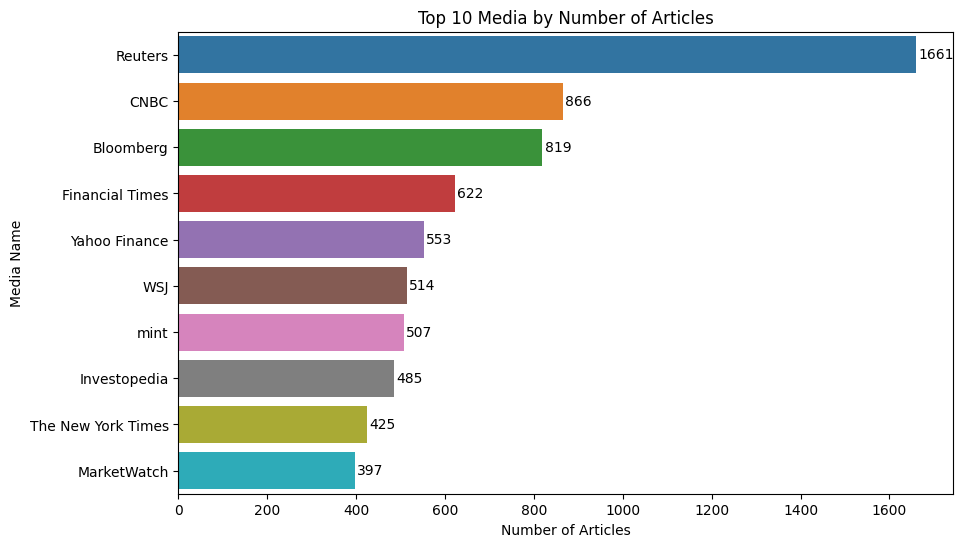

In [12]:
# Menghitung Top 10 media

media_counts = data['Nama Media'].value_counts().head(10)



# Membuat plot

plt.figure(figsize=(10,6))

sns.barplot(x=media_counts, y=media_counts.index)



# Menambahkan judul dan label sumbu

plt.title('Top 10 Media by Number of Articles')

plt.xlabel('Number of Articles')

plt.ylabel('Media Name')



# Menambahkan label jumlah artikel di samping bar

for i, count in enumerate(media_counts):

    plt.text(count + 5, i, str(count), va='center')



# Menampilkan plot

plt.show()


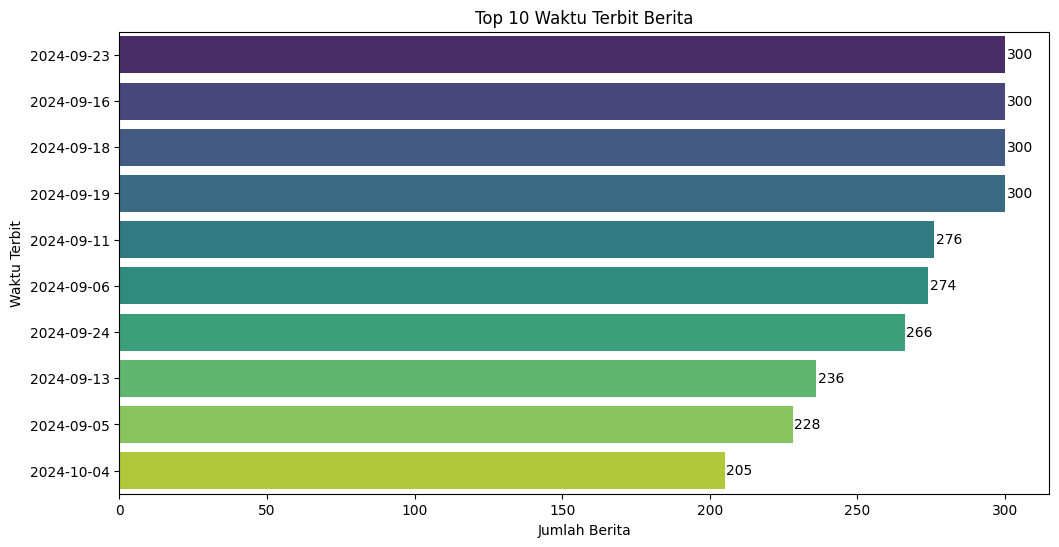

In [13]:
# Menghitung frekuensi waktu terbit

time_counts = data['Waktu Terbit'].value_counts().head(10)  # Mengambil 10 waktu terbit teratas



# Membuat plot

plt.figure(figsize=(12, 6))

sns.barplot(x=time_counts.values, y=time_counts.index, palette="viridis")



# Menambahkan judul dan label sumbu

plt.title('Top 10 Waktu Terbit Berita')

plt.xlabel('Jumlah Berita')

plt.ylabel('Waktu Terbit')



# Menambahkan label jumlah berita di dekat bar

for i, count in enumerate(time_counts):

    plt.text(count + 0.5, i, str(count), va='center')



# Menampilkan plot

plt.show()

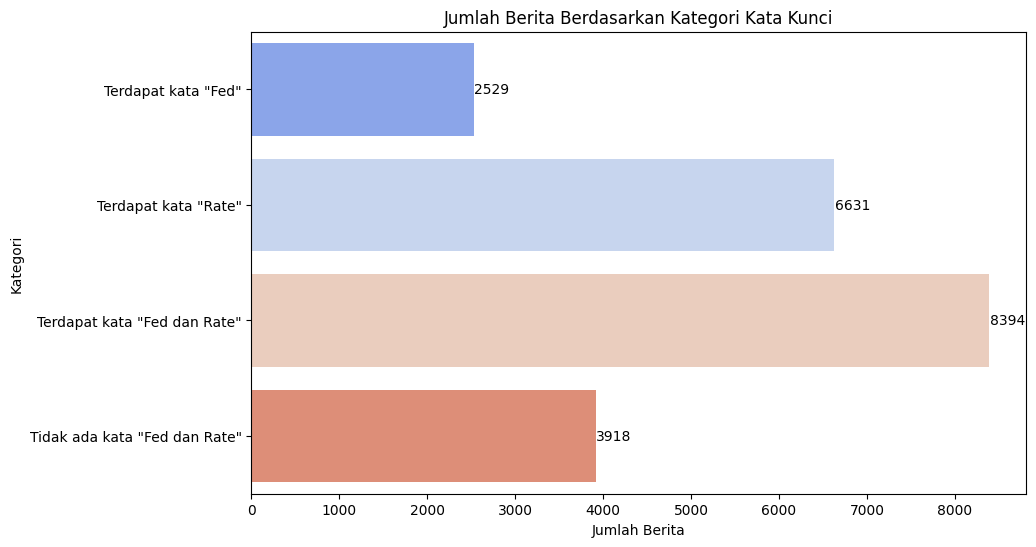

In [14]:
# Menghitung jumlah berita untuk setiap kategori

count_fed = data['Judul Berita'].str.contains('fed', case=False, na=False).sum()  # Mengandung 'fed'

count_rate = data['Judul Berita'].str.contains('rate', case=False, na=False).sum()  # Mengandung 'rate'

count_fed_rate = data[data['Judul Berita'].str.contains('fed', case=False, na=False) & 

                      data['Judul Berita'].str.contains('rate', case=False, na=False)].shape[0]  # Mengandung keduanya

count_neither = data[~data['Judul Berita'].str.contains('fed', case=False, na=False) & 

                     ~data['Judul Berita'].str.contains('rate', case=False, na=False)].shape[0]  # Tidak mengandung keduanya



# Menyusun data untuk visualisasi

categories = ['Terdapat kata "Fed"', 'Terdapat kata "Rate"', 'Terdapat kata "Fed dan Rate"', 'Tidak ada kata "Fed dan Rate"']

counts = [count_fed - count_fed_rate, count_rate - count_fed_rate, count_fed_rate, count_neither]



# Membuat plot horizontal

plt.figure(figsize=(10, 6))

sns.barplot(y=categories, x=counts, palette='coolwarm')  # Tukar x dan y untuk horizontal



# Menambahkan judul dan label sumbu

plt.title('Jumlah Berita Berdasarkan Kategori Kata Kunci')

plt.xlabel('Jumlah Berita')

plt.ylabel('Kategori')



# Menambahkan label jumlah berita di samping bar

for i, count in enumerate(counts):

    plt.text(count + 5, i, str(count), va='center')  # Posisi label di samping bar



# Menampilkan plot

plt.show()


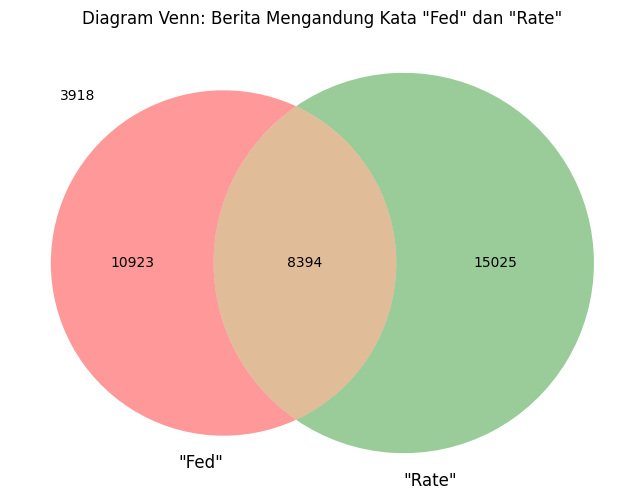

In [15]:
# Menghitung jumlah berita untuk setiap kategori

count_fed = data['Judul Berita'].str.contains('fed', case=False, na=False).sum()  # Mengandung 'fed'

count_rate = data['Judul Berita'].str.contains('rate', case=False, na=False).sum()  # Mengandung 'rate'

count_fed_rate = data[data['Judul Berita'].str.contains('fed', case=False, na=False) & 

                      data['Judul Berita'].str.contains('rate', case=False, na=False)].shape[0]  # Mengandung keduanya

count_neither = data[~data['Judul Berita'].str.contains('fed', case=False, na=False) & 

                     ~data['Judul Berita'].str.contains('rate', case=False, na=False)].shape[0]  # Tidak mengandung keduanya



# Membuat diagram Venn

plt.figure(figsize=(10, 6))



# Menggunakan venn2 untuk dua kategori

venn = venn2(subsets=(count_fed, count_rate, count_fed_rate), 

              set_labels=('"Fed"', '"Rate"'))



# Menambahkan informasi untuk kategori "Tidak ada kata Fed dan Rate"

plt.text(-0.6, 0.4, count_neither, fontsize=10, ha='center')



# Menambahkan judul

plt.title('Diagram Venn: Berita Mengandung Kata "Fed" dan "Rate"')

plt.show()


In [16]:
import re

import string



def clean_text(text):

    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation

    and remove words containing numbers.'''

    text = str(text).lower()

    text = re.sub('\[.*?\]', '', text)

    text = re.sub('https?://\S+|www\.\S+', '', text)

    text = re.sub('<.*?>+', '', text)

    text = re.sub('[«»]', '', text)  # menargetkan tanda khusus seperti « dan »

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub('\n', '', text)

    text = re.sub('\w*\d\w*', '', text)

    return text

In [17]:
# Ensure that the "Text" column is a string

data['Judul Berita'] = data['Judul Berita'].astype(str)

In [18]:
data['Clean Text']=data['Judul Berita'].apply(lambda x:clean_text(x))

data

Judul Berita  \
0      Global M&A volumes hit record high in 2021, br...   
1                How Many Side Hustle Hours Is Too Many?   
2      Uttarakhand CM to distribute free mobiles, tab...   
3      Here’s (Almost) Everything Wall Street Expects...   
4      Can the stock market's momentum continue into ...   
...                                                  ...   
21471  BoE's Pill urges cautious approach to cutting ...   
21472  September Jobs Data Could Delay Fed Rate Cuts,...   
21473  Steady Unemployment, Moderate Job Growth May H...   
21474  Dollar Soars as U.S. Job Market Surges, Gold D...   
21475  Fed's Tightrope: Balancing Job Growth and Infl...   

                         Nama Media Waktu Terbit  \
0                    ET BrandEquity   2022-01-01   
1                   The Motley Fool   2022-01-01   
2                              mint   2022-01-01   
3                         Bloomberg   2022-01-02   
4                               CNN   2022-01-02   
...                             ...          ...   
21471                           MSN   2024-10-04   
21472                  Coin Edition   2024-10-04   
21473  International Business Times   2024-10-04   
21474                  Devdiscourse   2024-10-04   
21475                  Devdiscourse   2024-10-04   

                                             Link Berita  \
0      https://brandequity.economictimes.indiatimes.c...   
1      https://www.fool.com/the-ascent/personal-finan...   
2      https://www.livemint.com/news/india/uttarakhan...   
3      https://www.bloomberg.com/graphics/2022-invest...   
4      https://www.cnn.com/2022/01/02/investing/stock...   
...                                                  ...   
21471  https://www.msn.com/en-us/money/markets/boe-s-...   
21472  https://coinedition.com/id/september-jobs-data...   
21473  https://www.ibtimes.com/steady-unemployment-mo...   
21474  https://www.devdiscourse.com/article/business/...   
21475  https://www.devdiscourse.com/article/business/...   

                                              Clean Text  
0      global ma volumes hit record high in  breach  ...  
1                 how many side hustle hours is too many  
2      uttarakhand cm to distribute free mobiles tabl...  
3       here’s almost everything wall street expects in   
4          can the stock markets momentum continue into   
...                                                  ...  
21471  boes pill urges cautious approach to cutting i...  
21472  september jobs data could delay fed rate cuts ...  
21473  steady unemployment moderate job growth may ha...  
21474  dollar soars as us job market surges gold dips...  
21475  feds tightrope balancing job growth and inflation  

[21472 rows x 5 columns]

In [19]:
from googletrans import Translator



# Membuat objek Translator

translator = Translator()



# Fungsi untuk mendeteksi bahasa

def detect_language(text):

    detection = translator.detect(text)

    return detection.lang, detection.confidence



# Menambahkan kolom 'language' dan 'confidence' berdasarkan deteksi bahasa dari kolom 'Judul Berita'

data[['Detected Language', 'confidence']] = data['Judul Berita'].apply(lambda x: pd.Series(detect_language(x)))

In [20]:
data['Detected Language'].value_counts()

Detected Language
en    21322
id      133
ms        5
sv        2
hi        1
lb        1
it        1
cs        1
hu        1
no        1
fr        1
om        1
tl        1
es        1
Name: count, dtype: int64

In [21]:
# Daftar bahasa yang ingin ditampilkan
bahasa_list = ['ms','sv','hi','lb','it','cs','hu','no','fr','om','tl','es']

# Filter data berdasarkan bahasa yang ada di daftar
filtered_data = data[data['Detected Language'].isin(bahasa_list)]

# Menampilkan hasil
filtered_data

Judul Berita  \
12                                            Paul Maass   
63                                        Ramin Cherafat   
557                                         Todd Aadland   
580                                     Dolce far niente   
611                                   Frantisek Taborsky   
772    Harga Emas Hari Ini : Analisis SWOT, Begini Pe...   
2233                    Rating Sovereigns | Zsófia Barta   
8382          Suku Bunga The Fed Diramal Turun Juni 2024   
8487                             Jeanna Smialek - Page 7   
8897                       NOK NOK NOKing on Norges door   
10168  BI Tak Bergantung pada The Fed Soal Otak-atik ...   
12173           Biden reprises role as consoler-in-chief   
16866  DoorDarshi Fund's Rajeev Agrawal sees opportun...   
17015    ”September Ceria” Tunggu Langkah The Fed dan BI   
20030  Mandiri Sekuritas Takar Dampak Penurunan BI Ra...   
20822  Bangko Sentral ng Pilipinas: Declaring Indepen...   
21209            ¿Qué sabe la Fed que el mercado ignora?   

                                Nama Media Waktu Terbit  \
12     Federal Reserve Bank of Kansas City   2022-01-03   
63     Federal Reserve Bank of Kansas City   2022-01-08   
557    Federal Reserve Bank of Kansas City   2022-03-03   
580                     The Economic Times   2022-03-05   
611                              ING Think   2022-03-09   
772                            Bareksa.com   2022-03-22   
2233                      Phenomenal World   2022-08-13   
8382                        CNBC Indonesia   2023-11-29   
8487                    The New York Times   2023-12-04   
8897                       Financial Times   2023-12-14   
10168                        CNN Indonesia   2024-02-12   
12173                            USA Today   2024-05-02   
16866                            CNBC TV18   2024-09-06   
17015                            Kompas.id   2024-09-09   
20030                            Iconomics   2024-09-25   
20822                 BusinessWorld Online   2024-09-30   
21209                        Funds Society   2024-10-03   

                                             Link Berita  \
12     https://www.kansascityfed.org/board-of-directo...   
63     https://www.kansascityfed.org/authors/ramin-ch...   
557    https://www.kansascityfed.org/senior-leadershi...   
580    https://m.economictimes.com/opinion/speaking-t...   
611     https://think.ing.com/author/frantisek-taborsky/   
772    https://www.bareksa.com/berita/emas/2022-03-23...   
2233   https://www.phenomenalworld.org/analysis/sover...   
8382   https://www.cnbcindonesia.com/market/202311290...   
8487    https://www.nytimes.com/by/jeanna-smialek?page=7   
8897   https://www.ft.com/content/737c367e-6d77-4ed8-...   
10168  https://www.cnnindonesia.com/ekonomi/202402071...   
12173  https://www.usatoday.com/story/news/2024/05/02...   
16866  https://www.cnbctv18.com/market/rajeev-agrawal...   
17015  https://www.kompas.id/baca/ekonomi/2024/09/09/...   
20030  https://www.theiconomics.com/capital-market/ma...   
20822  https://www.bworldonline.com/opinion/2024/09/3...   
21209  https://www.fundssociety.com/en/opinion/what-d...   

                                              Clean Text Detected Language  \
12                                            paul maass                lb   
63                                        ramin cherafat                hi   
557                                         todd aadland                sv   
580                                     dolce far niente                it   
611                                   frantisek taborsky                cs   
772    harga emas hari ini  analisis swot begini pelu...                ms   
2233                     rating sovereigns  zsófia barta                hu   
8382              suku bunga the fed diramal turun juni                 ms   
8487                               jeanna smialek  page                 sv   
8897                       nok nok noki

In [22]:
# Menghapus baris yang memiliki 'Detected Language' dengan nilai 'sv', 'lb', 'cs', 'tl', 'hu', 'no', 'fr', 'es', 'hi'
data = data[~data['Detected Language'].isin(['sv','hi','lb','it','cs','hu','no','fr','om','tl','es'])]


In [23]:
data['Detected Language'].value_counts()

Detected Language
en    21322
id      133
ms        5
Name: count, dtype: int64

In [24]:
# Definisikan nilai-nilai yang akan diubah
replace_values = ['ms']

# Mengganti nilai pada kolom Detected Language
data['Detected Language'] = data['Detected Language'].replace(replace_values, 'id')


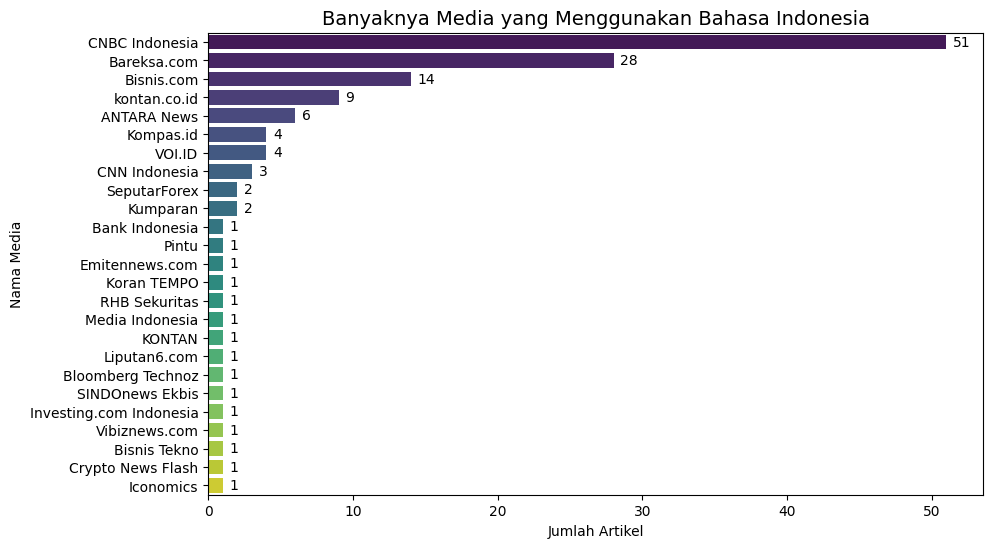

In [25]:
# Memfilter data untuk bahasa Indonesia ('id' sebagai kode bahasa untuk Indonesia)

indonesian_media = data[data['Detected Language'] == 'id']



# Menghitung jumlah kemunculan setiap media yang menulis dalam bahasa Indonesia

media_counts = indonesian_media['Nama Media'].value_counts()



# Membuat plot menggunakan seaborn

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=media_counts.values, y=media_counts.index, palette="viridis")



# Menambahkan angka pada setiap bar, di sebelah kanan bar

for p in ax.patches:

    ax.annotate(f'{p.get_width():,.0f}', 

                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),

                ha='left', va='center', 

                xytext=(5, 0), textcoords='offset points', fontsize=10, color='black')



# Menambahkan judul dan label

plt.title('Banyaknya Media yang Menggunakan Bahasa Indonesia', fontsize=14)

plt.xlabel('Jumlah Artikel')

plt.ylabel('Nama Media')



# Menampilkan plot

plt.show()

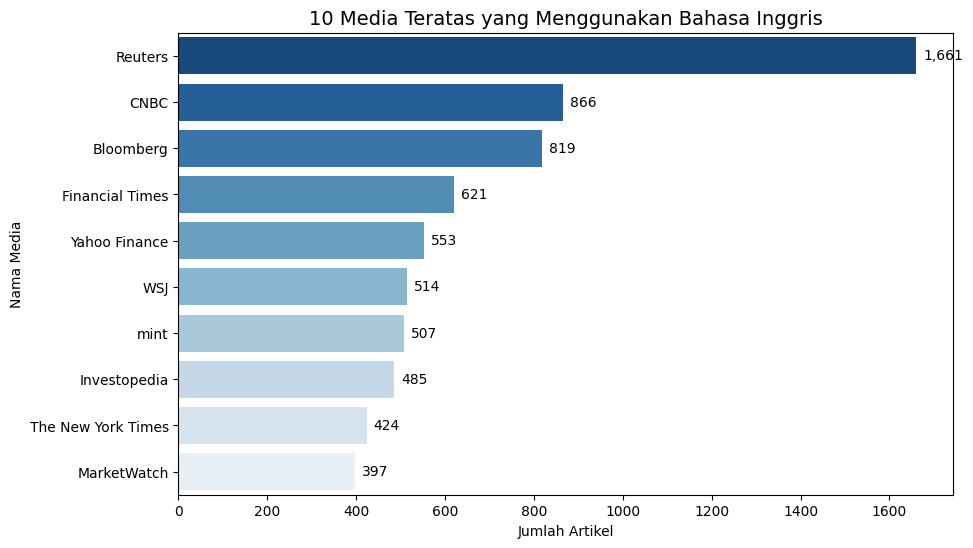

In [26]:
# Memfilter data untuk bahasa Inggris ('en' sebagai kode bahasa untuk English)

english_media = data[data['Detected Language'] == 'en']



# Menghitung jumlah kemunculan setiap media yang menulis dalam bahasa Inggris

media_counts_en = english_media['Nama Media'].value_counts().head(10)  # Hanya 10 media teratas



# Membuat plot menggunakan seaborn

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=media_counts_en.values, y=media_counts_en.index, palette="Blues_r")



# Menambahkan angka pada setiap bar, di sebelah kanan bar

for p in ax.patches:

    ax.annotate(f'{p.get_width():,.0f}', 

                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),

                ha='left', va='center', 

                xytext=(5, 0), textcoords='offset points', fontsize=10, color='black')



# Menambahkan judul dan label

plt.title('10 Media Teratas yang Menggunakan Bahasa Inggris', fontsize=14)

plt.xlabel('Jumlah Artikel')

plt.ylabel('Nama Media')



# Menampilkan plot

plt.show()

In [27]:
import pandas as pd

import plotly.express as px



# Menghitung panjang kata untuk kolom 'Clean Text' untuk data bahasa Inggris dan Indonesia

english_data = data[data['Detected Language'] == 'en'].copy()

indonesian_data = data[data['Detected Language'] == 'id'].copy()



# Menghitung jumlah kata di 'Clean Text'

english_data['text_word_count'] = english_data['Clean Text'].apply(lambda x: len(str(x).split()))

indonesian_data['text_word_count'] = indonesian_data['Clean Text'].apply(lambda x: len(str(x).split()))



# Histogram untuk Bahasa Inggris

fig_english = px.histogram(english_data, x='text_word_count', nbins=50, 

                            labels={'text_word_count': 'Text Length'}, 

                            title='English Text Word Count', 

                            color_discrete_sequence=['blue'])



# Histogram untuk Bahasa Indonesia

fig_indonesian = px.histogram(indonesian_data, x='text_word_count', nbins=50, 

                               labels={'text_word_count': 'Text Length'}, 

                               title='Indonesian Text Word Count', 

                               color_discrete_sequence=['green'])



# Menampilkan histogram Bahasa Inggris

fig_english.show()



# Menampilkan histogram Bahasa Indonesia

fig_indonesian.show()


In [28]:
import pandas as pd

import plotly.graph_objs as go

from plotly.offline import iplot



# Membuat salinan data yang difilter untuk bahasa Inggris ('en') dan bahasa Indonesia ('id')

english_data = data[data['Detected Language'] == 'en'].copy()

indonesian_data = data[data['Detected Language'] == 'id'].copy()



# Menghitung panjang (jumlah kata) di setiap teks pada kolom 'Clean Text' pada salinan data

english_data['word_count'] = english_data['Clean Text'].apply(lambda x: len(str(x).split()))

indonesian_data['word_count'] = indonesian_data['Clean Text'].apply(lambda x: len(str(x).split()))



# Membuat trace untuk bahasa Inggris

trace0 = go.Box(

    y=english_data['word_count'],

    name='English Text',

    marker=dict(

        color='blue',

    )

)



# Membuat trace untuk bahasa Indonesia

trace1 = go.Box(

    y=indonesian_data['word_count'],

    name='Indonesian Text',

    marker=dict(

        color='green',

    )

)



# Data untuk plot

data_plot = [trace0, trace1]



# Layout

layout = go.Layout(

    title="Length of the Text in Different Languages Before Using Stopword",

    yaxis=dict(

        title="Word Count",

    ),

    xaxis=dict(

        title="Language",

    )

)



# Membuat figure

fig = go.Figure(data=data_plot, layout=layout)



# Menampilkan plot

iplot(fig, filename="Length of Text in Different Languages")


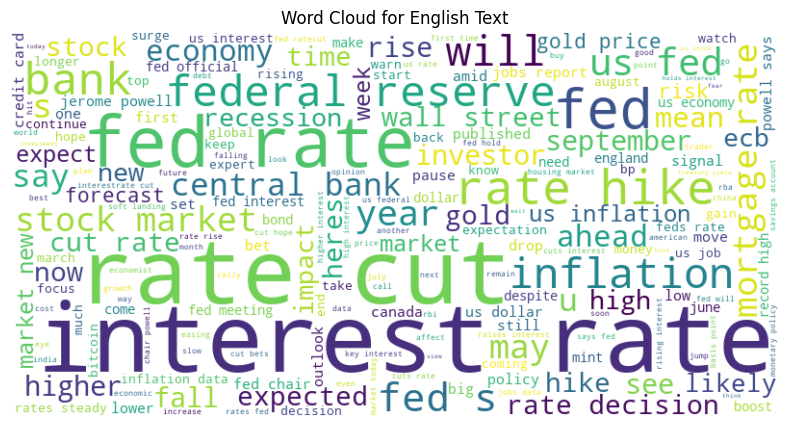

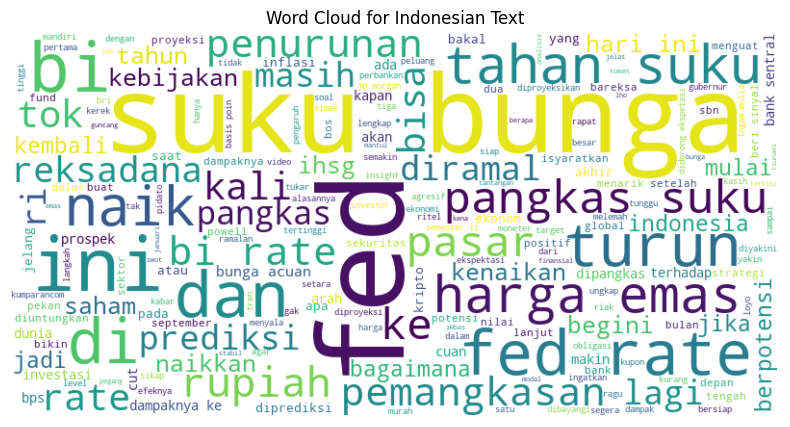

In [29]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud



# Memfilter data untuk bahasa Inggris dan Indonesia

english_data = data[data['Detected Language'] == 'en']['Clean Text']

indonesian_data = data[data['Detected Language'] == 'id']['Clean Text']



# Menggabungkan semua teks dalam satu string untuk masing-masing bahasa

english_text = ' '.join(english_data)

indonesian_text = ' '.join(indonesian_data)



# Membuat word cloud untuk Bahasa Inggris

wordcloud_english = WordCloud(width=800, height=400, background_color='white').generate(english_text)



# Membuat word cloud untuk Bahasa Indonesia

wordcloud_indonesian = WordCloud(width=800, height=400, background_color='white').generate(indonesian_text)



# Menampilkan wordcloud Bahasa Inggris

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_english, interpolation='bilinear')

plt.axis('off')

plt.title('Word Cloud for English Text')

plt.show()



# Menampilkan wordcloud Bahasa Indonesia

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_indonesian, interpolation='bilinear')

plt.axis('off')

plt.title('Word Cloud for Indonesian Text')

plt.show()


In [30]:
import pandas as pd

from collections import Counter



# Memfilter data untuk bahasa Inggris

english_data = data[data['Detected Language'] == 'en']['Clean Text']



# Memisahkan setiap kata dalam teks menjadi list

english_data_list = english_data.apply(lambda x: str(x).split())



# Menghitung frekuensi kemunculan setiap kata

top_words = Counter([item for sublist in english_data_list for item in sublist])



# Membuat DataFrame dari 20 kata yang paling umum muncul

top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])



# Menampilkan DataFrame dengan style background gradient

top_words_df.style.background_gradient(cmap='Blues')


In [31]:
# Membuat bar chart

fig = px.bar(top_words_df, x='count', y='Common_words', 

             title='Common Words in English Text', orientation='h',

             width=700, height=700, color='Common_words')



# Menampilkan grafik

fig.show()

In [32]:
import pandas as pd

from collections import Counter



# Memfilter data untuk bahasa Indonesia

indonesia_data = data[data['Detected Language'] == 'id']['Clean Text']



# Memisahkan setiap kata dalam teks menjadi list

english_data_list = indonesia_data.apply(lambda x: str(x).split())



# Menghitung frekuensi kemunculan setiap kata

top_words = Counter([item for sublist in english_data_list for item in sublist])



# Membuat DataFrame dari 20 kata yang paling umum muncul

top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])



# Menampilkan DataFrame dengan style background gradient

top_words_df.style.background_gradient(cmap='Blues')


In [33]:
# Membuat bar chart

fig = px.bar(top_words_df, x='count', y='Common_words', 

             title='Common Words in English Text', orientation='h',

             width=700, height=700, color='Common_words')



# Menampilkan grafik

fig.show()

In [34]:
data['Detected Language'].value_counts()

Detected Language
en    21322
id      138
Name: count, dtype: int64

In [35]:
from nltk.corpus import stopwords

import pandas as pd



# Daftar stopwords untuk beberapa bahasa yang tersedia di NLTK

stopwords_dict = {

    'en': stopwords.words('english'),

    'id': stopwords.words('indonesian')

}



# Fungsi untuk melakukan stopword removal berdasarkan bahasa

def remove_stopwords(text, lang):

    if lang in stopwords_dict:

        stop_words = set(stopwords_dict[lang])

        filtered_words = [word for word in text.split() if word.lower() not in stop_words]

        return ' '.join(filtered_words)

    else:

        return text  # Jika bahasa tidak ditemukan, kembalikan teks asli





# Misalnya, data sudah ada pada variable `data` dengan kolom 'Clean Text' dan 'language'

# Kita akan membuat kolom baru 'Clean Text Without Stopwords' yang sudah dihilangkan stopwords-nya

data['stopword'] = data.apply(lambda row: remove_stopwords(row['Clean Text'], row['Detected Language']), axis=1)


In [36]:
import pandas as pd

import plotly.express as px



# Menghitung panjang kata untuk kolom 'Clean Text' untuk data bahasa Inggris dan Indonesia

english_data = data[data['Detected Language'] == 'en'].copy()

indonesian_data = data[data['Detected Language'] == 'id'].copy()



# Menghitung jumlah kata di 'Clean Text'

english_data['text_word_count'] = english_data['stopword'].apply(lambda x: len(str(x).split()))

indonesian_data['text_word_count'] = indonesian_data['stopword'].apply(lambda x: len(str(x).split()))



# Histogram untuk Bahasa Inggris

fig_english = px.histogram(english_data, x='text_word_count', nbins=50, 

                            labels={'text_word_count': 'Text Length'}, 

                            title='English Text Word Count', 

                            color_discrete_sequence=['blue'])



# Histogram untuk Bahasa Indonesia

fig_indonesian = px.histogram(indonesian_data, x='text_word_count', nbins=50, 

                               labels={'text_word_count': 'Text Length'}, 

                               title='Indonesian Text Word Count', 

                               color_discrete_sequence=['green'])



# Menampilkan histogram Bahasa Inggris

fig_english.show()



# Menampilkan histogram Bahasa Indonesia

fig_indonesian.show()


In [37]:
import pandas as pd

import plotly.graph_objs as go

from plotly.offline import iplot



# Membuat salinan data yang difilter untuk bahasa Inggris ('en') dan bahasa Indonesia ('id')

english_data = data[data['Detected Language'] == 'en'].copy()

indonesian_data = data[data['Detected Language'] == 'id'].copy()



# Menghitung panjang (jumlah kata) di setiap teks pada kolom 'Clean Text' pada salinan data

english_data['word_count'] = english_data['stopword'].apply(lambda x: len(str(x).split()))

indonesian_data['word_count'] = indonesian_data['stopword'].apply(lambda x: len(str(x).split()))



# Membuat trace untuk bahasa Inggris

trace0 = go.Box(

    y=english_data['word_count'],

    name='English Text',

    marker=dict(

        color='blue',

    )

)



# Membuat trace untuk bahasa Indonesia

trace1 = go.Box(

    y=indonesian_data['word_count'],

    name='Indonesian Text',

    marker=dict(

        color='green',

    )

)



# Data untuk plot

data_plot = [trace0, trace1]



# Layout

layout = go.Layout(

    title="Length of the Text in Different Languages Using Stopword",

    yaxis=dict(

        title="Word Count",

    ),

    xaxis=dict(

        title="Language",

    )

)



# Membuat figure

fig = go.Figure(data=data_plot, layout=layout)



# Menampilkan plot

iplot(fig, filename="Length of Text in Different Languages")


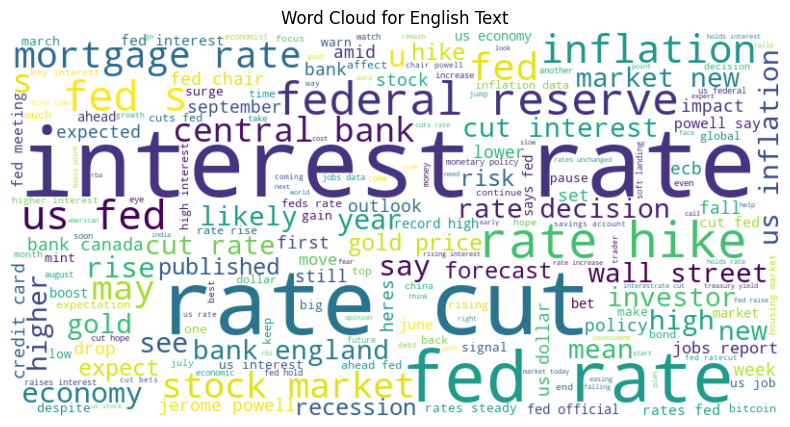

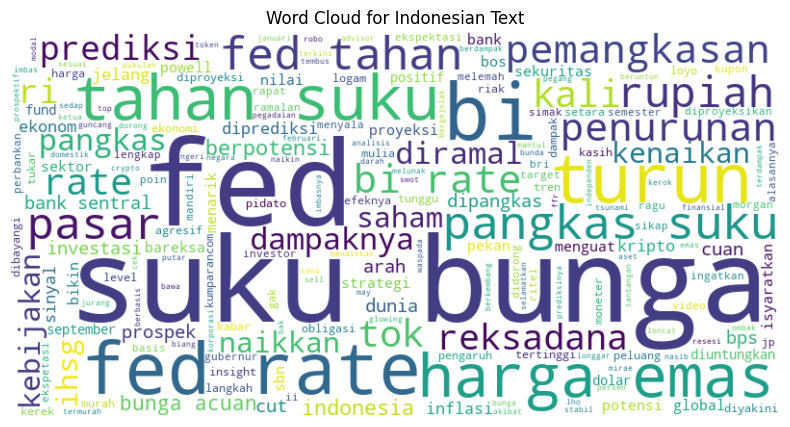

In [38]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud



# Memfilter data untuk bahasa Inggris dan Indonesia

english_data = data[data['Detected Language'] == 'en']['stopword']

indonesian_data = data[data['Detected Language'] == 'id']['stopword']



# Menggabungkan semua teks dalam satu string untuk masing-masing bahasa

english_text = ' '.join(english_data)

indonesian_text = ' '.join(indonesian_data)



# Membuat word cloud untuk Bahasa Inggris

wordcloud_english = WordCloud(width=800, height=400, background_color='white').generate(english_text)



# Membuat word cloud untuk Bahasa Indonesia

wordcloud_indonesian = WordCloud(width=800, height=400, background_color='white').generate(indonesian_text)



# Menampilkan wordcloud Bahasa Inggris

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_english, interpolation='bilinear')

plt.axis('off')

plt.title('Word Cloud for English Text')

plt.show()



# Menampilkan wordcloud Bahasa Indonesia

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud_indonesian, interpolation='bilinear')

plt.axis('off')

plt.title('Word Cloud for Indonesian Text')

plt.show()


In [39]:
import pandas as pd

from collections import Counter



# Memfilter data untuk bahasa Inggris

english_data = data[data['Detected Language'] == 'en']['stopword']



# Memisahkan setiap kata dalam teks menjadi list

english_data_list = english_data.apply(lambda x: str(x).split())



# Menghitung frekuensi kemunculan setiap kata

top_words = Counter([item for sublist in english_data_list for item in sublist])



# Membuat DataFrame dari 20 kata yang paling umum muncul

top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])



# Menampilkan DataFrame dengan style background gradient

top_words_df.style.background_gradient(cmap='Blues')


In [40]:
# Membuat bar chart

fig = px.bar(top_words_df, x='count', y='Common_words', 

             title='Common Words in English Text', orientation='h',

             width=700, height=700, color='Common_words')



# Menampilkan grafik

fig.show()

In [41]:
import pandas as pd

from collections import Counter



# Memfilter data untuk bahasa Indonesia

indonesia_data = data[data['Detected Language'] == 'id']['stopword']



# Memisahkan setiap kata dalam teks menjadi list

indonesia_data_list = indonesia_data.apply(lambda x: str(x).split())



# Menghitung frekuensi kemunculan setiap kata

top_words = Counter([item for sublist in indonesia_data_list for item in sublist])



# Membuat DataFrame dari 20 kata yang paling umum muncul

top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])



# Menampilkan DataFrame dengan style background gradient

top_words_df.style.background_gradient(cmap='Blues')


In [ ]:
# Membuat bar chart

fig = px.bar(top_words_df, x='count', y='Common_words', 

             title='Common Words in Indonesian Text', orientation='h',

             width=700, height=700, color='Common_words')



# Menampilkan grafik

fig.show()

In [43]:
import torch
import pandas as pd
from transformers import AutoTokenizer, LlamaForCausalLM, pipeline,AutoModelForCausalLM

# Step 1: Load the model and tokenizer
base_model = "/kaggle/input/gemma-2/transformers/gemma-2-9b-it/2"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Load the model with automatic device mapping to save memory
model = AutoModelForCausalLM.from_pretrained(base_model, torch_dtype=torch.float16, device_map="auto")

# Create the text generation pipeline
pipe = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Step 2: Define the get_sentiment function with the new prompt
def get_sentiment(sentence):
    # Refined prompt with explicit format requirement
    message = [
        {
            "role": "user",
            "content": f"As an expert in economic sentiment analysis and financial markets, assess the sentiment of this statement regarding Fed rate decisions and their impact on the stock market. "
                       f"Respond in the exact format: 'The sentiment is: Positive', 'The sentiment is: Negative', or 'The sentiment is: Neutral'.\n"
                       f"Text: \"{sentence}\"\n"
                       f"The sentiment is:"
        }
    ]
    # Generate the prompt with refined parameters
    prompt = pipe.tokenizer.apply_chat_template(message, tokenize=False, add_generation_prompt=True)
    outputs = pipe(
        prompt,
        do_sample=True,
        temperature=0.1,
        top_k=1,
        top_p=0.1,
        max_new_tokens=5,  # Ensure enough space for a concise response
        add_special_tokens=True
    )
    
    # Process the generated response to get sentiment
    resp = outputs[0]["generated_text"][len(prompt):].strip()
    if "The sentiment is: Negative" in resp:
        return "negative"
    elif "The sentiment is: Positive" in resp:
        return "positive"
    elif "The sentiment is: Neutral" in resp:
        return "neutral"
    else:
        return "neutral"  # Default fallback in case of format mismatch

# Step 5: Apply sentiment analysis on each news title with progress notification
def get_sentiment_with_progress(data):
    for i, row in data.iterrows():
        # Get sentiment for the current row
        sentiment = get_sentiment(row['Judul Berita'])
        data.at[i, 'sentiment'] = sentiment
        
        # Print progress for every 1000 rows
        if (i + 1) % 1000 == 0:
            print(f"{i + 1} rows have been processed.")
    
    return data

# Add a new column for sentiment
data['sentiment'] = None

# Apply the function with progress tracking
data = get_sentiment_with_progress(data)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

1000 rows have been processed.
2000 rows have been processed.
3000 rows have been processed.
4000 rows have been processed.
5000 rows have been processed.
6000 rows have been processed.
7000 rows have been processed.
8000 rows have been processed.
9000 rows have been processed.
10000 rows have been processed.
11000 rows have been processed.
12000 rows have been processed.
13000 rows have been processed.
14000 rows have been processed.
15000 rows have been processed.
16000 rows have been processed.
17000 rows have been processed.
18000 rows have been processed.
19000 rows have been processed.
20000 rows have been processed.
21000 rows have been processed.


In [44]:
data.sentiment.value_counts()

sentiment
neutral     8116
negative    7036
positive    6308
Name: count, dtype: int64

In [54]:
data.to_csv('sentimentfedrate.csv', index=False)

In [46]:
import plotly.express as px



# Menghitung jumlah data berdasarkan kelas sentimen

sentiment_counts = data['sentiment'].value_counts().reset_index()

sentiment_counts.columns = ['sentiment', 'Count']



# Membuat visualisasi bar chart menggunakan Plotly

fig = px.bar(sentiment_counts, x='sentiment', y='Count', color='sentiment', 

             title='Total Count of Each Sentiment Class', 

             labels={'Count':'Total', 'Sentiment':'Sentiment Class'}, 

             height=400, width=600)



# Menampilkan grafik

fig.show()


In [47]:
import plotly.express as px



# Filter data untuk setiap sentimen

negative_data = data[data['sentiment'] == 'negative']

positive_data = data[data['sentiment'] == 'positive']

neutral_data = data[data['sentiment'] == 'neutral']



# Menghitung jumlah berita per media untuk masing-masing sentimen

media_negative_counts = negative_data['Nama Media'].value_counts().reset_index()

media_positive_counts = positive_data['Nama Media'].value_counts().reset_index()

media_neutral_counts = neutral_data['Nama Media'].value_counts().reset_index()



# Menamai kolom hasil perhitungan

media_negative_counts.columns = ['Nama Media', 'Jumlah Berita Negatif']

media_positive_counts.columns = ['Nama Media', 'Jumlah Berita Positif']

media_neutral_counts.columns = ['Nama Media', 'Jumlah Berita Netral']



# Menampilkan hanya 10 media teratas

top_10_negative_media = media_negative_counts.head(10)

top_10_positive_media = media_positive_counts.head(10)

top_10_neutral_media = media_neutral_counts.head(10)



# Membuat visualisasi bar chart untuk Sentimen Negatif

fig_neg = px.bar(top_10_negative_media, 

                 x='Nama Media', 

                 y='Jumlah Berita Negatif', 

                 title='Top 10 Media yang Memberitakan Sentimen Negatif',

                 labels={'Nama Media':'Media', 'Jumlah Berita Negatif':'Jumlah Berita'},

                 color='Nama Media',

                 height=500)



# Membuat visualisasi bar chart untuk Sentimen Positif

fig_pos = px.bar(top_10_positive_media, 

                 x='Nama Media', 

                 y='Jumlah Berita Positif', 

                 title='Top 10 Media yang Memberitakan Sentimen Positif',

                 labels={'Nama Media':'Media', 'Jumlah Berita Positif':'Jumlah Berita'},

                 color='Nama Media',

                 height=500)



# Membuat visualisasi bar chart untuk Sentimen Netral

fig_neutral = px.bar(top_10_neutral_media, 

                     x='Nama Media', 

                     y='Jumlah Berita Netral', 

                     title='Top 10 Media yang Memberitakan Sentimen Netral',

                     labels={'Nama Media':'Media', 'Jumlah Berita Netral':'Jumlah Berita'},

                     color='Nama Media',

                     height=500)



# Menampilkan plot

fig_neg.show()

fig_pos.show()

fig_neutral.show()


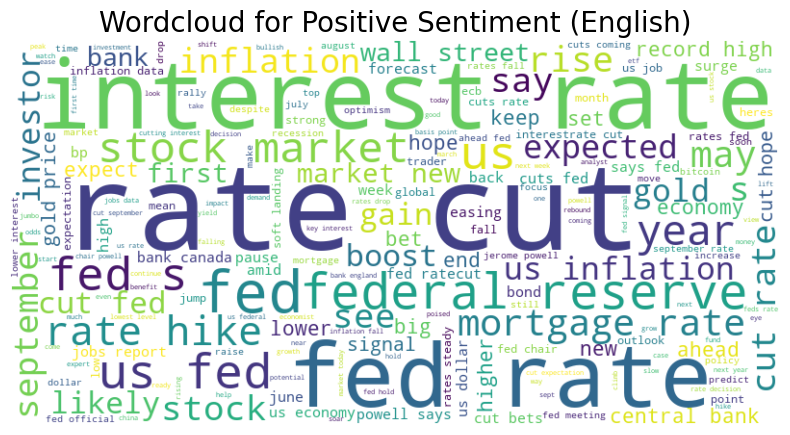

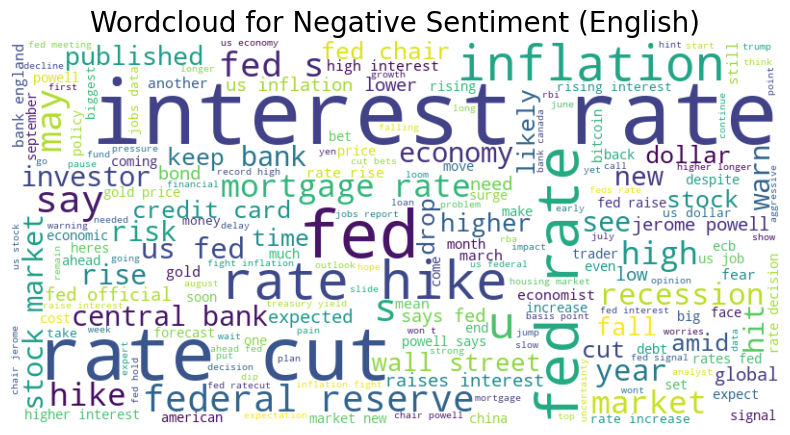

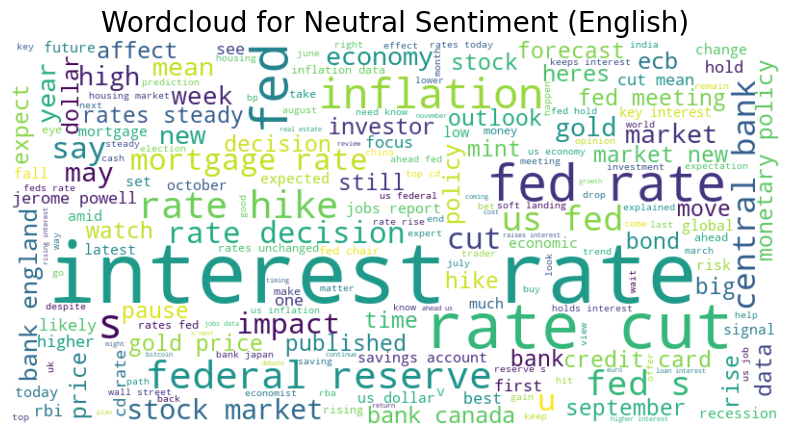

In [48]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt



# Fungsi untuk menampilkan wordcloud

def plot_wordcloud(text, title):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))

    plt.imshow(wordcloud, interpolation="bilinear")

    plt.title(title, fontsize=20)

    plt.axis('off')

    plt.show()



# Filter data hanya untuk bahasa Inggris

english_data = data[data['Detected Language'] == 'en']



# Menggabungkan semua teks berdasarkan sentimen untuk bahasa Inggris

positive_text_en = ' '.join(english_data[english_data['sentiment'] == 'positive']['stopword'])

negative_text_en = ' '.join(english_data[english_data['sentiment'] == 'negative']['stopword'])

neutral_text_en = ' '.join(english_data[english_data['sentiment'] == 'neutral']['stopword'])



# Membuat wordcloud untuk setiap kategori sentimen dalam bahasa Inggris

plot_wordcloud(positive_text_en, 'Wordcloud for Positive Sentiment (English)')

plot_wordcloud(negative_text_en, 'Wordcloud for Negative Sentiment (English)')

plot_wordcloud(neutral_text_en, 'Wordcloud for Neutral Sentiment (English)')


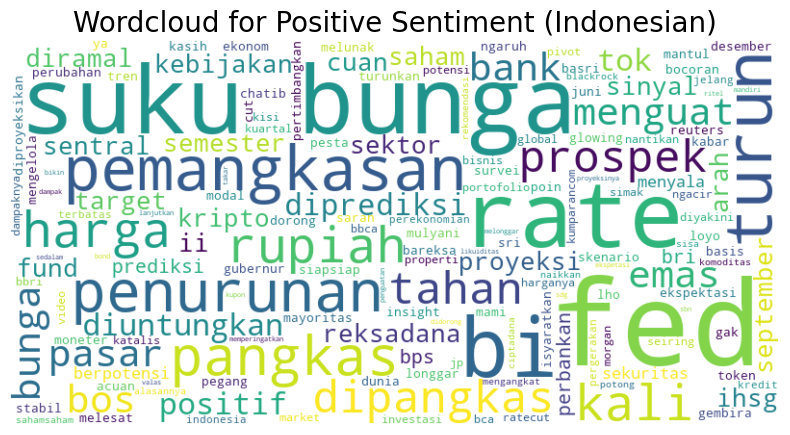

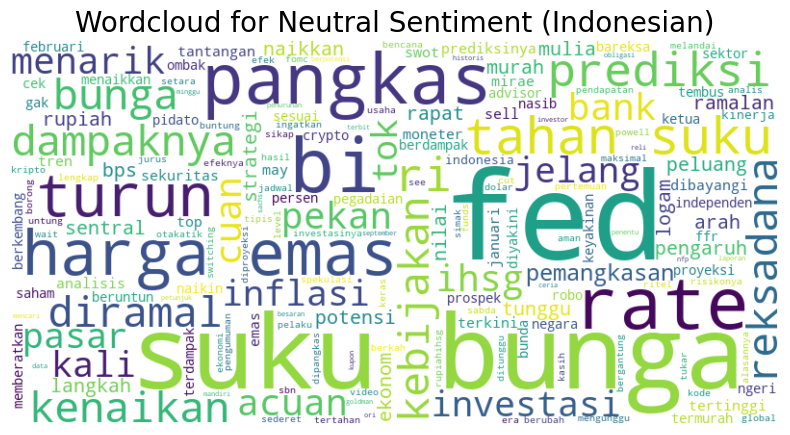

In [49]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt



# Fungsi untuk menampilkan wordcloud

def plot_wordcloud(text, title):

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))

    plt.imshow(wordcloud, interpolation="bilinear")

    plt.title(title, fontsize=20)

    plt.axis('off')

    plt.show()



# Filter data hanya untuk bahasa Inggris

indonesian_data = data[data['Detected Language'] == 'id']



# Menggabungkan semua teks berdasarkan sentimen untuk bahasa Inggris

positive_text_en = ' '.join(indonesian_data[indonesian_data['sentiment'] == 'positive']['stopword'])

negative_text_en = ' '.join(indonesian_data[indonesian_data['sentiment'] == 'negative']['stopword'])

neutral_text_en = ' '.join(indonesian_data[indonesian_data['sentiment'] == 'neutral']['stopword'])



# Membuat wordcloud untuk setiap kategori sentimen dalam bahasa Inggris

plot_wordcloud(positive_text_en, 'Wordcloud for Positive Sentiment (Indonesian)')

plot_wordcloud(neutral_text_en, 'Wordcloud for Neutral Sentiment (Indonesian)')


In [50]:
import pandas as pd

import plotly.express as px

from collections import Counter



# Fungsi untuk mendapatkan unigrams yang paling sering muncul

def get_top_n_words(text_series, n):

    words = ' '.join(text_series).split()

    top_n = Counter(words).most_common(n)

    return top_n



# Mengambil top 20 unigrams untuk masing-masing sentimen

pos_unigrams = get_top_n_words(data[data['sentiment'] == 'positive']['stopword'], 20)

neg_unigrams = get_top_n_words(data[data['sentiment'] == 'negative']['stopword'], 20)

neutral_unigrams = get_top_n_words(data[data['sentiment'] == 'neutral']['stopword'], 20)



# Dataframe untuk unigrams Positif

df1 = pd.DataFrame(pos_unigrams, columns=['Text', 'count'])



# Dataframe untuk unigrams Negatif

df2 = pd.DataFrame(neg_unigrams, columns=['Text', 'count'])



# Dataframe untuk unigrams Netral

df3 = pd.DataFrame(neutral_unigrams, columns=['Text', 'count'])



# Plot unigrams untuk sentimen Positif

fig1 = px.bar(df1, x='count', y='Text', orientation='h',

              title='Top 20 Unigrams in Positive Text', 

              labels={'count': 'Count', 'Text': 'Unigram'}, color='Text')

fig1.show()



# Plot unigrams untuk sentimen Negatif

fig2 = px.bar(df2, x='count', y='Text', orientation='h',

              title='Top 20 Unigrams in Negative Text', 

              labels={'count': 'Count', 'Text': 'Unigram'}, color='Text')

fig2.show()



# Plot unigrams untuk sentimen Netral

fig3 = px.bar(df3, x='count', y='Text', orientation='h',

              title='Top 20 Unigrams in Neutral Text', 

              labels={'count': 'Count', 'Text': 'Unigram'}, color='Text')

fig3.show()


In [51]:
import pandas as pd

import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer



# Fungsi untuk mendapatkan top n bigram

def get_top_n_gram(corpus, ngram_range, n=None):

    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:n]



# Mengambil top 20 bigram untuk masing-masing sentimen

pos_bigrams = get_top_n_gram(data[data['sentiment'] == 'positive']['stopword'], (2,2), 20)

neg_bigrams = get_top_n_gram(data[data['sentiment'] == 'negative']['stopword'], (2,2), 20)

neutral_bigrams = get_top_n_gram(data[data['sentiment'] == 'neutral']['stopword'], (2,2), 20)



# Dataframe untuk bigram Positif

df1 = pd.DataFrame(pos_bigrams, columns=['Text', 'count'])



# Dataframe untuk bigram Negatif

df2 = pd.DataFrame(neg_bigrams, columns=['Text', 'count'])



# Dataframe untuk bigram Netral

df3 = pd.DataFrame(neutral_bigrams, columns=['Text', 'count'])



# Plot bigrams untuk sentimen Positif

fig1 = px.bar(df1, x='count', y='Text', orientation='h',

              title='Top 20 Bigrams in Positive Text',

              labels={'count': 'Count', 'Text': 'Bigram'}, color='Text')

fig1.show()



# Plot bigrams untuk sentimen Negatif

fig2 = px.bar(df2, x='count', y='Text', orientation='h',

              title='Top 20 Bigrams in Negative Text',

              labels={'count': 'Count', 'Text': 'Bigram'}, color='Text')

fig2.show()



# Plot bigrams untuk sentimen Netral

fig3 = px.bar(df3, x='count', y='Text', orientation='h',

              title='Top 20 Bigrams in Neutral Text',

              labels={'count': 'Count', 'Text': 'Bigram'}, color='Text')

fig3.show()


In [52]:
# Mengambil top 20 trigrams untuk masing-masing sentimen

pos_trigrams = get_top_n_gram(data[data['sentiment'] == 'positive']['stopword'], (3,3), 20)

neg_trigrams = get_top_n_gram(data[data['sentiment'] == 'negative']['stopword'], (3,3), 20)

neutral_trigrams = get_top_n_gram(data[data['sentiment'] == 'neutral']['stopword'], (3,3), 20)



# Dataframe untuk trigram Positif

df1 = pd.DataFrame(pos_trigrams, columns=['Text', 'count'])



# Dataframe untuk trigram Negatif

df2 = pd.DataFrame(neg_trigrams, columns=['Text', 'count'])



# Dataframe untuk trigram Netral

df3 = pd.DataFrame(neutral_trigrams, columns=['Text', 'count'])



# Plot trigrams untuk sentimen Positif

fig1 = px.bar(df1, x='count', y='Text', orientation='h',

              title='Top 20 Trigrams in Positive Text',

              labels={'count': 'Count', 'Text': 'Trigram'}, color='Text')

fig1.show()



# Plot trigrams untuk sentimen Negatif

fig2 = px.bar(df2, x='count', y='Text', orientation='h',

              title='Top 20 Trigrams in Negative Text',

              labels={'count': 'Count', 'Text': 'Trigram'}, color='Text')

fig2.show()



# Plot trigrams untuk sentimen Netral

fig3 = px.bar(df3, x='count', y='Text', orientation='h',

              title='Top 20 Trigrams in Neutral Text',

              labels={'count': 'Count', 'Text': 'Trigram'}, color='Text')

fig3.show()

In [1]:
import torch
import pandas as pd
from transformers import AutoTokenizer, LlamaForCausalLM, pipeline,AutoModelForCausalLM

# Step 1: Load the model and tokenizer
base_model = "/kaggle/input/llama-3.1/transformers/8b-instruct/2"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Load the model with automatic device mapping to save memory
model = AutoModelForCausalLM.from_pretrained(base_model, torch_dtype=torch.float16, device_map="auto")

# Create the text generation pipeline
pipe = pipeline('text-generation', model=model, tokenizer=tokenizer)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
def get_sentiment(sentence):
    # Refined prompt with explicit format requirement
    message = [
        {
            "role": "user",
            "content": f"As an expert in economic sentiment analysis and financial markets, assess the sentiment of this statement regarding Fed rate decisions and their impact on the stock market. "
                       f"Respond in the exact format: 'The sentiment is: Positive', 'The sentiment is: Negative', or 'The sentiment is: Neutral'.\n"
                       f"Text: \"{sentence}\"\n"
                       f"The sentiment is:"
        }
    ]
    # Generate the prompt with refined parameters
    prompt = pipe.tokenizer.apply_chat_template(message, tokenize=False, add_generation_prompt=True)
    outputs = pipe(
        prompt,
        do_sample=True,
        temperature=0.1,
        top_k=1,
        top_p=0.1,
        max_new_tokens=5,  # Ensure enough space for a concise response
        add_special_tokens=True
    )
    
    # Process the generated response to get sentiment
    resp = outputs[0]["generated_text"][len(prompt):].strip()
    print(resp)  # Optional: for debugging purposes
    if "The sentiment is: Negative" in resp:
        return "negative"
    elif "The sentiment is: Positive" in resp:
        return "positive"
    elif "The sentiment is: Neutral" in resp:
        return "neutral"
    else:
        return "neutral"  # Default fallback in case of format mismatch

# Testing
get_sentiment("US Fed could hike interest rates as soon as March, says Bullard")


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I'm not able to


'neutral'